# Practical Machine Learning for Physicists
## Week 2 Exercise - Part 1
## Deadline Monday 9th November at 12pm (Noon)

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style 
import matplotlib as mpl


#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#For debugging problems
print(tf.__version__)

2.3.0


### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#rescaling images so that they are in range 0-1
train_images=train_images/255.0
test_images=test_images/255.0

11493376/11490434 [==============================] - 0s 0us/step


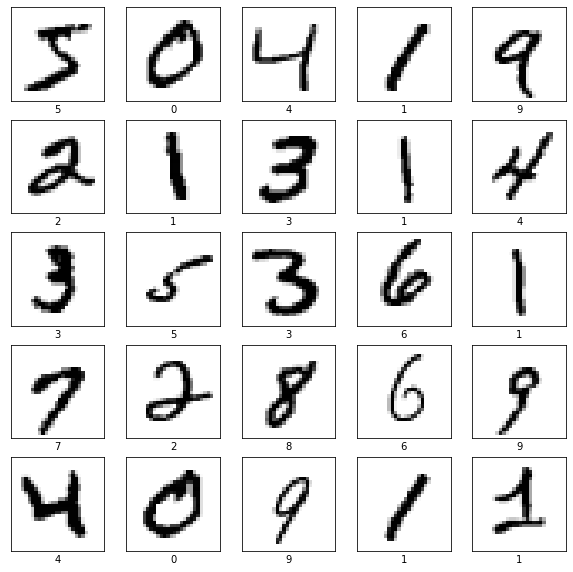

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [4]:
#reshaping image arrays so that they can be passed through CNN
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [19]:
#initiates new model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='sigmoid'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='sigmoid'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10))

In this model I have used one convolutional layer, as required by task. I have used multiple 'Dense' layers with a high amount of neurons, so to prevent over fitting I have inserted 'droupout' layers which reduce over fitting to the training set.

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                151456    
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

When training the model I decided to find out what the best amount of epochs were, but due to there being minute changes when training each model there wasn't a clear solution. Using EarlyStopping I was able to set a criteria on when the fitting was no longer useful. This also allowed me to use excessive epochs because the fitting will stop when the val_loss no longer increases.

In [21]:
#compiling model so that we can see how well the model is doing
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#use this to. prevent over fitting of model on the training set
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, 
                    validation_data=(test_images, test_labels),
                             callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 1.0314 - accuracy: 0.6557 - val_loss: 0.2674 - val_accuracy: 0.9300
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2799 - accuracy: 0.9232 - val_loss: 0.1136 - val_accuracy: 0.9681
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1758 - accuracy: 0.9502 - val_loss: 0.0947 - val_accuracy: 0.9714
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1420 - accuracy: 0.9600 - val_loss: 0.0825 - val_accuracy: 0.9745
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1201 - accuracy: 0.9655 - val_loss: 0.0703 - val_accuracy: 0.9779
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1037 - accuracy: 0.9706 - val_loss: 0.0646 - val_accuracy: 0.9798
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0899 - accuracy: 0.9740 - val_loss: 0.0650 - val_accuracy: 0.9805
Epoch 

313/313 - 1s - loss: 0.0715 - accuracy: 0.9848
Test Accuracy: 98.48%


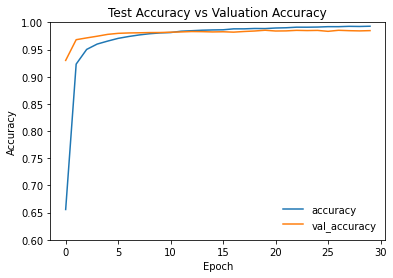

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Accuracy: {}%'.format(np.round(test_acc*100,2)))
low = np.sort(history.history['accuracy'])[0]

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Valuation Accuracy')
plt.ylim([round(low-0.05,1), 1])
plt.legend()

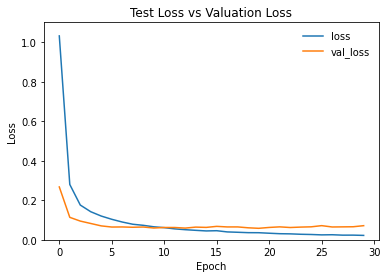

In [23]:
high = np.sort(history.history['loss'])[-1]

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss vs Valuation Loss')
plt.ylim([0,round(high+0.05,1)])
plt.legend()

With one convolutional layer the highest test accuracy that I could achieve was 98.48%, but on overall the final test accurcay tended to be around 98.2%.

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a multiple convolutional layers?

In [10]:
#initialise model
model = keras.models.Sequential()

#CNN
model.add(keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(28, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(28, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(28, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

#NN
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#use this to prevent over fitting of model on the training set
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(train_images, train_labels, epochs=50, batch_size=128, 
                    validation_data=(test_images, test_labels),
                             callbacks=[early_stop])

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.8929 - accuracy: 0.6874 - val_loss: 0.1513 - val_accuracy: 0.9590
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3418 - accuracy: 0.8953 - val_loss: 0.0872 - val_accuracy: 0.9737
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2456 - accuracy: 0.9247 - val_loss: 0.0730 - val_accuracy: 0.9799
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1982 - accuracy: 0.9391 - val_loss: 0.0612 - val_accuracy: 0.9823
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1701 - accuracy: 0.9474 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1456 - accuracy: 0.9566 - val_loss: 0.0433 - val_accuracy: 0.9867
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1367 - accuracy: 0.9598 - val_loss: 0.0427 - val_accuracy: 0.9887
Epoch 

313/313 - 1s - loss: 0.0324 - accuracy: 0.9919
Test Accuracy: 99.19%


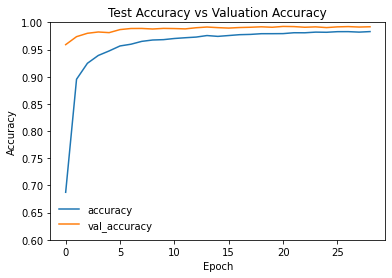

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Accuracy: {}%'.format(np.round(test_acc*100,2)))
low = np.sort(history.history['accuracy'])[0]

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Valuation Accuracy')
plt.ylim([round(low-0.05,1), 1])
plt.legend()

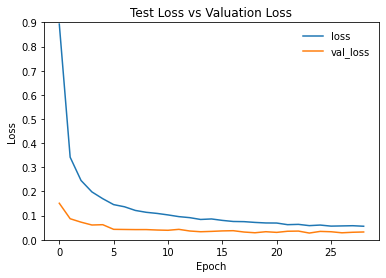

In [13]:
high = np.sort(history.history['loss'])[-1]

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss vs Valuation Loss')
plt.ylim([0,round(high+0.05,1)])
plt.legend()

As with one convultional layer I was occasionally able to produce a higher final test accurcay than normal using multiple convolutional layers. The highest final test accuracy was 99.43% but in general they tend to be around 99.1%. For there to be a significant difference in the final test accuracy I had to add 3 more convolutional layers for less than 1% increase in test accuracy. In this case it may not be totaly beneficial to add more convolutional layers as the big increase in computational power required does not yield much more accuracy. 